[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\rafab\AppData\Local\Temp\ipykernel_3800\3910099587.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Processed_Text'] = cleaned_data['Topic'].astype(str) + ' ' + cleaned_data['Comment'].astype(str)
C:\Users\rafab\AppData\Local\Temp\ipykernel_3800

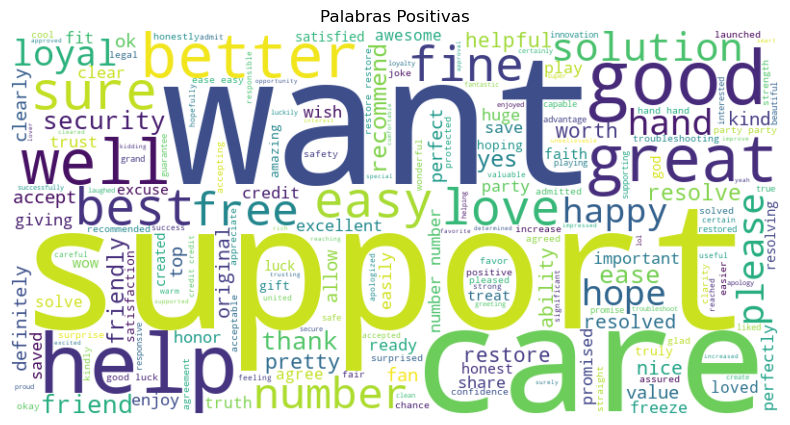

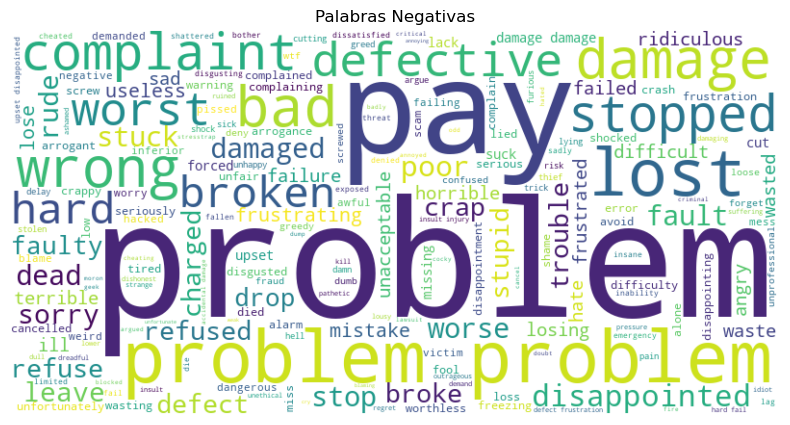

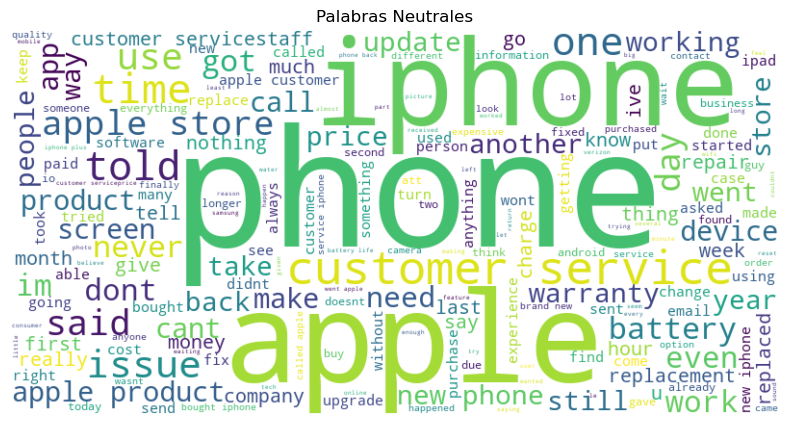

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descargar recursos de nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Instanciar lematizador y analizador de sentimientos
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

# Definir stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para preprocesar el texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar signos de puntuación y caracteres no alfabéticos
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenizar y eliminar stopwords, y lematizar
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

# Cargar el archivo CSV
file_path = 'Data/review-apple consumer affair.csv'
data = pd.read_csv(file_path)

# Eliminar filas con valores nulos en las columnas 'Title' y 'Text'
cleaned_data = data.dropna(subset=['Topic', 'Comment'])

# Aplicar preprocesamiento al texto combinado
cleaned_data['Processed_Text'] = cleaned_data['Topic'].astype(str) + ' ' + cleaned_data['Comment'].astype(str)
cleaned_data['Processed_Text'] = cleaned_data['Processed_Text'].apply(preprocess_text)

# Función para clasificar el sentimiento de las palabras
def sentiment_analysis(text):
    pos_words = []
    neg_words = []
    neu_words = []
    
    words = text.split()
    for word in words:
        score = analyzer.polarity_scores(word)
        if score['compound'] >= 0.05:
            pos_words.append(word)
        elif score['compound'] <= -0.05:
            neg_words.append(word)
        else:
            neu_words.append(word)
    
    return pos_words, neg_words, neu_words

# Aplicar análisis de sentimiento al texto preprocesado
combined_text = ' '.join(cleaned_data['Processed_Text'])
pos_words, neg_words, neu_words = sentiment_analysis(combined_text)

# Función para generar y mostrar nubes de palabras
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Nube de palabras positivas
generate_wordcloud(pos_words, 'Palabras Positivas')

# Nube de palabras negativas
generate_wordcloud(neg_words, 'Palabras Negativas')

# Nube de palabras neutrales
generate_wordcloud(neu_words, 'Palabras Neutrales')


In [2]:
# Modificar la función para devolver una etiqueta de sentimiento general
def sentiment_label(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Aplicar la función a la columna 'Processed_Text' para obtener la etiqueta de sentimiento
cleaned_data['Sentiment'] = cleaned_data['Processed_Text'].apply(sentiment_label)
cleaned_data

C:\Users\rafab\AppData\Local\Temp\ipykernel_3800\4149664210.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Sentiment'] = cleaned_data['Processed_Text'].apply(sentiment_label)


,Rating,Topic,Location,Name,Comment,Date,Processed_Text,Sentiment
0,1.0,"Customer Service,Staff","Tucson, AZ",Lois,I am an emergency responder that used the obno...,"Reviewed Feb. 5, 2024",customer servicestaff emergency responder used...,Negative
1,1.0,Customer Service,"Surrey, BC",Daniel,"Own an Apple 11 mini, broke the screen and for...","Reviewed Jan. 11, 2024",customer service apple mini broke screen forgo...,Positive
2,2.0,"Contract &amp; Terms,Price","Hiram, GA",Theresa,Apps are terrible by comparison. No alarm cloc...,"Reviewed Dec. 27, 2023",contract amp termsprice apps terrible comparis...,Negative
3,1.0,"Customer Service,Price","Spring Valley, CA",Charles,The multitude of issues with this phone have b...,"Reviewed Nov. 15, 2023",customer serviceprice multitude issue phone on...,Negative
4,2.0,Price,"Sandy, UT",Eni,It is frustrating having to pay for an overpri...,"Reviewed Oct. 25, 2023",price frustrating pay overpriced iphone specia...,Positive
...,...,...,...,...,...,...,...,...
1499,1.0,"Customer Service,Contract &amp; Terms","La Habra, CA",Maggie,"I purchased a new iPhone on September 4, 2011....","Reviewed Oct. 18, 2011",customer servicecontract amp term purchased ne...,Negative
1500,1.0,Customer Service,"Rustenburg, Other",Wilma,I got an iPhone 4 to be able to access Faceboo...,"Reviewed Oct. 13, 2011",customer service got iphone able access facebo...,Negative
1502,1.0,Price,"New Delhi, Other",Shweta,I bought an Apple iPhone 4 almost two months a...,"Reviewed Sept. 22, 2011",price bought apple iphone almost two month ago...,Positive
1503,3.0,Price,"Belfast, Other",Barry,I brought an app for my iPhone 3GS. The cryst...,"Reviewed Sept. 22, 2011",price brought app iphone g crystal portal cost...,Positive


In [3]:
def calculate_nps(cleaned_data):
    promoters = cleaned_data[cleaned_data['Rating'] >= 4].shape[0]
    detractors = cleaned_data[cleaned_data['Rating'] <= 2].shape[0]
    passives = cleaned_data[cleaned_data['Rating'] == 3].shape[0]
    total_respondents = cleaned_data.shape[0]
    nps = ((promoters - detractors) / total_respondents) * 100
    return nps, promoters, passives, detractors

nps, promoters, passives, detractors = calculate_nps(cleaned_data)
print(f'Net Promoter Score (NPS): {nps}')

Net Promoter Score (NPS): -41.31054131054131


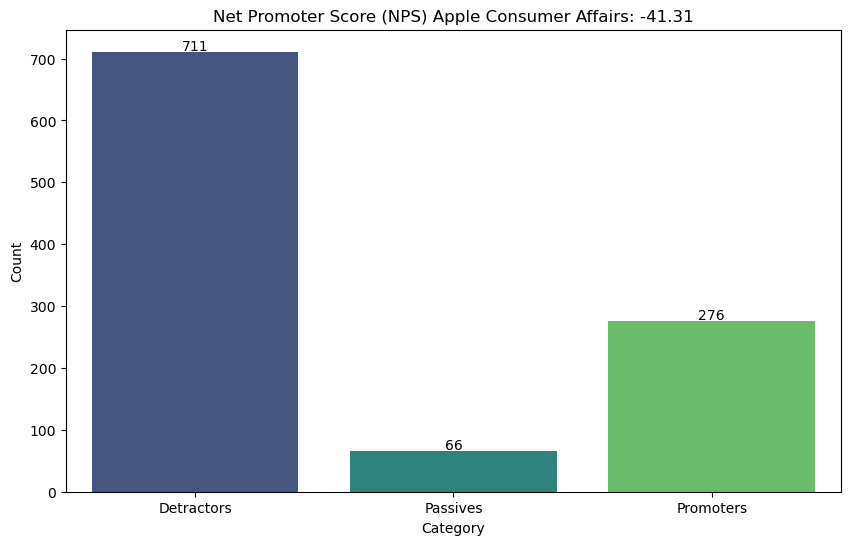

In [4]:
import seaborn as sns
# Datos para la visualización
nps_data = pd.DataFrame({
    'Category': ['Detractors', 'Passives', 'Promoters'],
    'Count': [detractors, passives, promoters]
})

# Crear el gráfico de barras para NPS
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=nps_data, palette='viridis')
plt.title(f'Net Promoter Score (NPS) Apple Consumer Affairs: {nps:.2f}')
plt.xlabel('Category')
plt.ylabel('Count')

# Añadir las etiquetas de los valores en las barras
for index, value in enumerate(nps_data['Count']):
    plt.text(index, value + 2, str(value), ha='center')

plt.show()

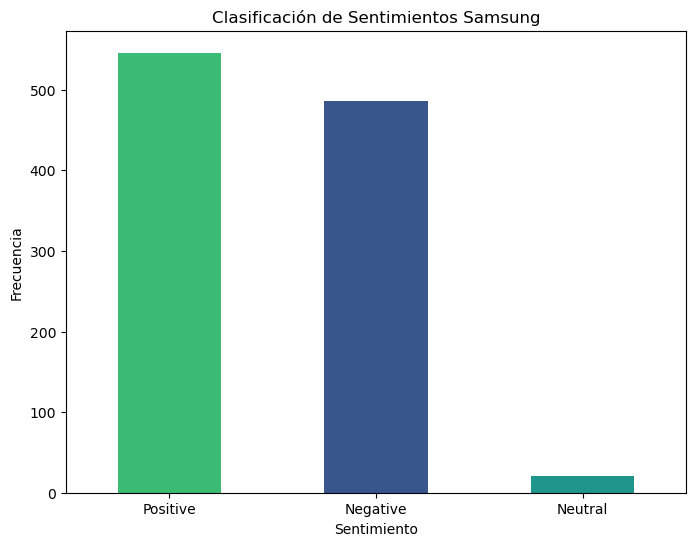

In [5]:
# Contar las ocurrencias de cada sentimiento
conteo_sentimientos = cleaned_data['Sentiment'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_sentimientos.plot(kind='bar', color=['#3CBB75FF', '#39568CFF', '#1F968BFF'])

# Establecer títulos y etiquetas
plt.title('Clasificación de Sentimientos Samsung')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar la visualización
plt.show()


In [6]:
# Prepara los datos para el heatmap
df_topics = cleaned_data['Topic'].str.get_dummies(sep=',')
df_topics_sum = df_topics.sum().sort_values(ascending=False)

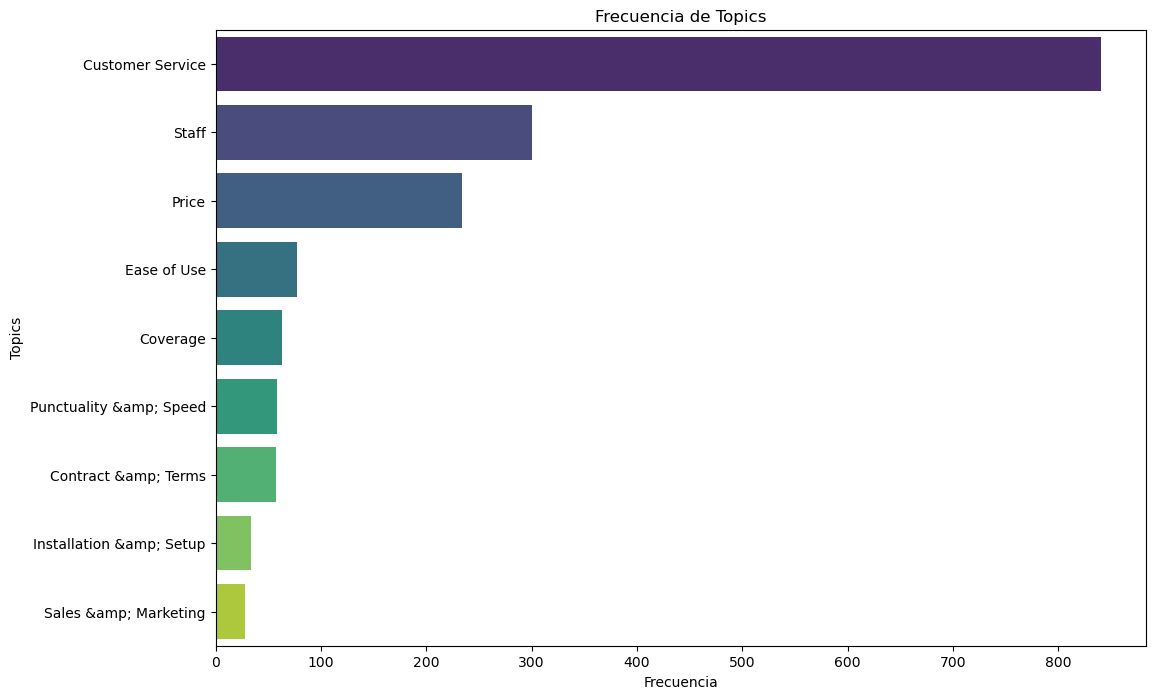

In [7]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_topics_sum.values, y=df_topics_sum.index, palette='viridis')
plt.title('Frecuencia de Topics')
plt.xlabel('Frecuencia')
plt.ylabel('Topics')
plt.show()

In [8]:
cleaned_data.to_csv('Apple_reviews_modificado.csv', index = False)